In [111]:
# Importing necessary libraries
from keras.datasets import fashion_mnist  # Importing Fashion MNIST dataset from Keras
import numpy as np  # Importing NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib library for plotting
import wandb
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib
import seaborn as sns
import pandas

In [69]:
!wandb login 57566fbb0e091de2e298a4320d872f9a2b200d12

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\DELL\.netrc


In [70]:
wandb.init(project="DL_Assignment1", name="Question:1")

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


# **Question-1**

In [71]:
#loading data set
(fashion_mnist_train, fashion_mnist_train_label), (fashion_mnist_test, fashion_mnist_test_label) = fashion_mnist.load_data()
(mnist_train, mnist_train_label), (mnist_test, mnist_test_label) = mnist.load_data()


In [72]:
# Checking Dataset shape
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# type(x_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
# x_train.shape

def input_matrix(image):
    """
    Reshape and normalize input images.
    
    Parameters:
    - image: Input image
    
    Returns:
    - Reshaped and normalized input matrix
    """
    return image.reshape(image.shape[0], -1) / 255.0


In [73]:
# class labels for fashion mnist dataset
label_fahion_mnist = {
     0 :  "T-shirt/top",
     1 :  "Trouser",
     2 :  "Pullover",
     3 :  "Dress",
     4 :  "Coat",
     5 :  "Sandal",
     6 :  "Shirt",
     7 :  "Sneaker",
     8 :  "Bag",
     9 :  "Ankle boot"
}

label_mnist = {
     0 :  "0",
     1 :  "1",
     2 :  "2",
     3 :  "3",
     4 :  "4",
     5 :  "5",
     6 :  "6",
     7 :  "7",
     8 :  "8",
     9 :  "9"
}

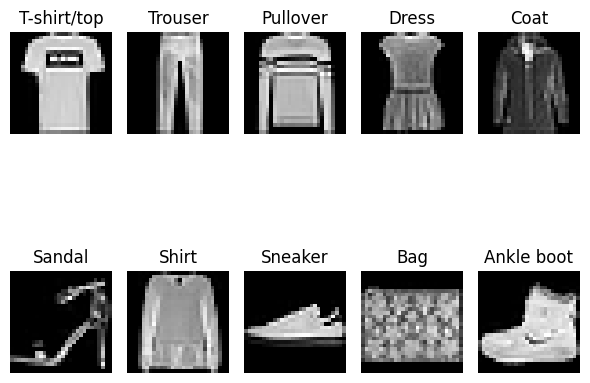

In [74]:
# Creating subplots to display one image of each class
fig, axes = plt.subplots(2, 5, figsize=(6, 6))

# Iterating through each class
for i in range(len(label_fahion_mnist)):
    row = i // 5  # Calculating row index for subplot
    col = i % 5   # Calculating column index for subplot
    
    # Finding the index of the first image in the training set with label i
    idx = np.argmax(fashion_mnist_train_label == i)
    
    # Displaying the image corresponding to the label i
    axes[row, col].imshow(fashion_mnist_train[idx], cmap='gray')  # Displaying grayscale image
    axes[row, col].set_title(label_fahion_mnist[i])  # Setting title with class label
    axes[row, col].axis('off')  # Turning off axis

    # wandb.log({"Question1": [wandb.Image(fashion_mnist_train[idx], caption= label[i])]})

# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Displaying the plot
plt.show()

In [75]:
wandb.finish()

# **Activation Functions**

In [76]:
""" Activation Class :- Contains various diffrent activations functions """
class Activation_Functions:
    def __init__(self) -> None:
        pass


    def sigmoid(self, x):
        # Compute sigmoid element-wise for each element of the matrix
        sigmoid_x = np.zeros_like(x)  # Initialize output matrix with zeros
        
        # Apply the sigmoid function element-wise using vectorized operations
        positive_mask = x >= 0
        sigmoid_x[positive_mask] = 1.0 / (1.0 + np.exp(-x[positive_mask]))
        sigmoid_x[~positive_mask] = np.exp(x[~positive_mask]) / (1.0 + np.exp(x[~positive_mask]))
        
        return sigmoid_x


    def ReLU(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)

    

    def softmax(self, x):
        # Subtract the maximum value along the axis to prevent overflow
        max_x = np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x - max_x)
        
        # Compute softmax probabilities
        softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        
        return softmax_x


    def activation(self, x, fun):
        if fun == "tanh":
            return self.tanh(x)
        elif fun == "sigmoid":
            return self.sigmoid(x)
        elif fun == "ReLU":
            return self.ReLU(x)
        elif fun == "softmax":
            return self.softmax(x)

# **Derivatives**

In [77]:
class Derivatives:
    def __init__(self) -> None:
        """ 
            Constructor method for Derivatives class.
            Initialization of object of Activation_Functions class
        """
        self.fun = Activation_Functions()  # Creating an instance of Activation_Functions class

    
    def sigmoid_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.
        
        Parameters:
        - x: Input value
        
        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.sigmoid(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative
    
    def softmax_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.
        
        Parameters:
        - x: Input value
        
        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.softmax(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative

    
    def tanh_derivative(self, x):
        """
        Computes the derivative of the hyperbolic tangent (tanh) activation function.
        
        Parameters:
        - x: Input value
        
        Returns:
        - Derivative of the tanh activation function
        """
        g = self.fun.tanh(x)  # Computing tanh activation
        return 1 - g * g  # Computing and returning derivative

    
    def ReLU_derivative(self, x):
        """
        Computes the derivative of the Rectified Linear Unit (ReLU) activation function.
        
        Parameters:
        - x: Input value
        
        Returns:
        - Derivative of the ReLU activation function
        """
        # g = self.fun.ReLU(x)  # Computing ReLU activation
        # return np.where(g > 0, 1, 0)  # Computing and returning derivative

        x[x>0]=1
        x[x<=0]=0
        return x


    def derivatives(self, x, activation_function):
        """
        Computes the derivative of a specified activation function.
        
        Parameters:
        - x: Input value
        - activation_function: Name of the activation function
        
        Returns:
        - Derivative of the specified activation function
        """
        if activation_function == "sigmoid":
            return self.sigmoid_derivative(x)  # Computing derivative for sigmoid activation
        elif activation_function == "tanh":
            return self.tanh_derivative(x)  # Computing derivative for tanh activation
        elif activation_function == "ReLU":
            return self.ReLU_derivative(x)  # Computing derivative for ReLU activation
        elif activation_function == "softmax":
            return self.softmax_derivative(x)


# **Loss Functions**

In [78]:
class Loss_Function:
    def __init__(self) -> None:
        """
        Constructor method for Loss_Function class.
        Initializes the default loss function to cross-entropy.
        """
        self.default_loss_function = "cross_entropy"


    def compute_loss(self, y_true, y_hat, loss_function):
        """
        Computes the loss based on the given true labels and predicted probabilities.
        
        Parameters:
        - y_true: True labels (one-hot encoded) 
        - y_hat: Predicted probabilities
        - loss_function: Name of the loss function to be used
        
        Returns:
        - Loss value
        """

        
        if loss_function == None: 
            # If no loss function is specified, use the default loss function
            loss_function = self.default_loss_function

        if loss_function == "cross_entropy":
            # Set a small value epsilon to avoid numerical instability
            epsilon = 1e-15
            # Clip the predicted values to avoid log(0) and log(1) scenarios
            y_hat = np.clip(y_hat, epsilon, 1. - epsilon)
            # Compute the cross-entropy loss for each sample
            loss = -np.sum(y_true * np.log(y_hat), axis=1)
            # Compute the mean loss across all samples
            loss = np.mean(loss)
            # Return the computed loss
            return loss
        
        if loss_function == "squared_loss":
            loss = (1/2) * np.sum((y_true-y_hat)**2) / (y_hat.shape[0])
            return loss
        

    def last_output_derivative(self, y_hat,y_true, activation_derivative, loss_function):
        
        # epsilon = 1e-15
        #     # Clip the predicted values to avoid log(0) and log(1) scenarios
        # y_hat = np.clip(y_hat, epsilon, 1. - epsilon)
        
        if(loss_function == "squared_loss"):
            # print(y_hat.shape, y_true.shape)
            return (y_hat - y_true)* activation_derivative/ len(y_true)
        
        if(loss_function == "cross_entropy"):
            return -(y_true - y_hat)
        


# **Question - 2**

In [79]:
class Network:
    def __init__(self, PARAM):
        """
        Constructor method for Network class.
        
        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layers, output size)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store activations of each layer
        self.h = {}       # Dictionary to store outputs of each layer
        self.fun = Activation_Functions()  # Instance of Activation_Functions class
        self.size_list = [PARAM["input_size"]] + PARAM["hidden_layers"] + [PARAM["output_size"]]  # List containing sizes of all layers
        self.y_predictions = []  # List to store predicted probabilities for each input sample


    def initialize_parameters(self, initialization):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):
            if initialization == "random":
                self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
                self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values
            elif initialization == "xavier":
                inpt_w = self.size_list[layer-1]
                opt_w = self.size_list[layer]
                inpt_b = 1
                opt_b = self.size_list[layer]

                variance_w = 2.0/(inpt_w + opt_w)
                variance_b = 2.0/(inpt_b + opt_b)

                self.weight[layer] = np.random.randn(inpt_w, opt_w) * np.sqrt(variance_w) # Initializing weights with random values
                self.bias[layer] = np.random.randn(inpt_b, opt_b) *np.sqrt(variance_b)  # Initializing biases with random values


                


    def forward_pass(self, x, activation_function):
        """
        Method to perform forward pass through the network.
        
        Parameters:
        - x: Input data
        - activation_function: Name of the activation function to be used
        
        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        total_layer = len(self.size_list)
        self.h[0] = x  # Input layer

        for layer in range(1, total_layer-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing preactivation
            self.h[layer] = self.fun.activation(self.a[layer], fun=activation_function)  # Applying activation function
    
        self.a[total_layer-1] = np.dot(self.h[layer], self.weight[total_layer-1]) + self.bias[total_layer-1]  # Computing weighted sum for final layer
        self.h[total_layer-1] = self.fun.activation(self.a[total_layer-1], fun="softmax")  # Applying softmax activation
        
        return self.h[total_layer-1]  # Returning output of final layer


    def predict_probability(self, dataset, activation, init):
        """
        Method to predict probabilities for each input sample in the dataset.
        
        Parameters:
        - dataset: Input dataset
        - activation: Name of the activation function to be used
        
        Returns:
        - List containing predicted probabilities for each input sample
        """
        self.initialize_parameters(init)  # Initializing network parameters

        for image in dataset:
            x = image.reshape(1, -1) / 255.0  # Reshaping and normalizing input data
            y_hat = self.forward_pass(x, activation)  # Performing forward pass
            self.y_predictions.append(y_hat)  # Storing predicted probabilities
            
        return self.y_predictions  # Returning list of predicted probabilities



In [80]:
PARAM = {
    "input_size" : 784,            # Size of the input layer (number of input features)
    "hidden_layers" : [5, 6, 7],   # Sizes of hidden layers in the neural network
    "output_size" : 10             # Size of the output layer (number of classes)
}

n1 = Network(PARAM)  # Creating an instance of the Network class with the given parameters
y_pred = n1.predict_probability(fashion_mnist_train, "sigmoid", "xavier")  # Predicting probabilities for each sample in the training dataset using sigmoid activation function



In [81]:
np.set_printoptions(suppress=True)  # Suppressing scientific notation in printed arrays
print(y_pred[0])  # Printing the predicted probabilities for the first sample

[[0.11510044 0.07057153 0.06348642 0.07406339 0.14122031 0.13982905
  0.06380265 0.11264239 0.07097192 0.1483119 ]]


# **Question - 3**

# **Optimizers**

In [82]:
class Optimizer:
    def __init__(self, neural_network, PARAM) -> None:
        """
        Constructor method for Optimizer class.
        
        Parameters:
        - neural_network: Instance of the neural network class
        - PARAM: Dictionary containing optimization parameters (eta, weight_decay, optimizer, beta)
        """
        self.neural_network = neural_network  # Neural network object
        self.eta = PARAM["eta"]  # Learning rate
        self.weight_decay = PARAM["weight_decay"]  # Weight decay factor
        self.optimizer = PARAM["optimizer"]  # Optimization algorithm (sgd, mgd, nag)
        self.beta = PARAM["beta"]  # Momentum factor for momentum-based optimization
        self.epsilon = PARAM["epsilon"]
        self.beta2 = PARAM["beta2"]
        self.beta1 = PARAM["beta1"]
        self.momentum = PARAM["momentum"]

    def stochastic_gradient_decent(self):
        """
        Method to perform stochastic gradient descent optimization.
        """
        weight_decay = self.weight_decay
        eta = self.eta

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.weight[layer] = self.neural_network.weight[layer] - eta * self.neural_network.grad_w[layer]  # Updating weights
            self.neural_network.bias[layer] = self.neural_network.bias[layer] - eta * self.neural_network.grad_b[layer]  # Updating biases
        
    def update(self, t):
        """
        Method to update network parameters based on the selected optimization algorithm.
        """
        if self.optimizer == "sgd":
            self.stochastic_gradient_decent()
        elif self.optimizer == "mgd":
            self.momentum_based_gradient_decent()
        elif self.optimizer == "nag":
            self.nesterov_accelerated_gradient_decent()
        elif self.optimizer == "rmsprop":
            self.rmsprop()
        elif self.optimizer == "adam":
            self.adam(t)
        elif self.optimizer == "nadam":
            self.nadam(t)
             

    def momentum_based_gradient_decent(self):
        """
        Method to perform momentum-based gradient descent optimization.
        """
        weight_decay = self.weight_decay

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
                decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
                self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

                uw = self.momentum * self.neural_network.prv_w[layer] + self.eta * self.neural_network.grad_w[layer]  # Computing update for weights
                ub = self.momentum * self.neural_network.prv_b[layer] + self.eta * self.neural_network.grad_b[layer]  # Computing update for biases

                self.neural_network.weight[layer] -= uw  # Updating weights
                self.neural_network.bias[layer] -= ub  # Updating biases

                self.neural_network.prv_w[layer] = uw  # Storing previous weight update
                self.neural_network.prv_b[layer] = ub  # Storing previous bias update


    def nesterov_accelerated_gradient_decent(self):
        """
        Method to perform Nesterov Accelerated Gradient Descent optimization.
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.prv_w[layer] = self.momentum * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.momentum * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer]

            self.neural_network.weight[layer] -= ((self.eta) * (self.momentum * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer])) 
            self.neural_network.bias[layer] -= ((self.eta) * (self.momentum * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer])) 

    def rmsprop(self):
        """
        Method to perform Root Mean Square Propogation optimization.
        """
        for layer in range(len(self.neural_network.size_list) - 1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta * self.neural_network.prv_w[layer] + (1 - self.beta) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv_b[layer] = self.beta * self.neural_network.prv_b[layer] + (1 - self.beta) * (self.neural_network.grad_b[layer] ** 2)

            self.neural_network.weight[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_w[layer] + self.epsilon))) * self.neural_network.grad_w[layer]
            self.neural_network.bias[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_b[layer] + self.epsilon))) * self.neural_network.grad_b[layer]

    
    def adam(self, t):
        """
        Method to perform adam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta1 * self.neural_network.prv_w[layer] + (1 - self.beta1) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta1 * self.neural_network.prv_b[layer] + (1 - self.beta1) * self.neural_network.grad_b[layer]

            
            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)

            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta1**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta1**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * m_w_hat
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * m_b_hat


    def nadam(self, t):
        """
        Method to perform nadam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            
            self.neural_network.prv_w[layer] = self.beta1 * self.neural_network.prv_w[layer] + (1 - self.beta1) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta1 * self.neural_network.prv_b[layer] + (1 - self.beta1) * self.neural_network.grad_b[layer]

            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)
            
            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta1**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta1**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * (self.beta * m_w_hat + ((1 - self.beta1) * self.neural_network.grad_w[layer])/(1 - self.beta1 ** t))
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * (self.beta * m_b_hat + ((1 - self.beta1) * self.neural_network.grad_b[layer])/(1 - self.beta1 ** t))
            

            

    


        


# **Neural Network**

In [83]:
class Neural_Network:
    def __init__(self, PARAM) -> None:
        """
        Constructor method for Neural_Network class.
        
        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layer sizes, output size,
                 activation function, training input, training output)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store preactivation of each layer
        self.h = {}       # Dictionary to store activations of each layer
        self.grad_w = {}  # Dictionary to store gradients of weights for each layer
        self.grad_b = {}  # Dictionary to store gradients of biases for each layer
        self.prv_w = {}   # Dictionary to store previous weights for momentum-based optimization
        self.prv_b = {}   # Dictionary to store previous biases for momentum-based optimization
        self.activation_function = PARAM["activation_function"]  # Activation function for hidden layers
        self.loss_function = PARAM["loss_function"]  # Activation function for hidden layers
        # self.y_true = PARAM["training_output"]  # True labels for training data
        self.initialization = PARAM["init"]
        # self.input = PARAM["training_input"]     # Input data for training
        self.hidden_layers = PARAM["hidden_layers"]
        self.neuron_in_hidden_layer = PARAM["neuron_in_hidden_layer"]
        self.dataset = PARAM["dataset"]
        # self.size_list = [PARAM["input_size"]] + [self.neuron_in_hidden_layer for _ in range(self.hidden_layers)] + [PARAM["output_size"]]  # Sizes of all layers
        self.act = Activation_Functions()  # Instance of Activation_Functions class
        self.derivative = Derivatives()     # Instance of Derivatives class
        self.loss = Loss_Function()
        self.prv2_w = {}
        self.prv2_b = {}

        if self.dataset == 'fashion_mnist':
            (train_img, train_lbl), (test_img, test_lbl) = (fashion_mnist_train, fashion_mnist_train_label), (fashion_mnist_test, fashion_mnist_test_label)
        if self.dataset == 'mnist':
            (train_img, train_lbl), (test_img, test_lbl) = (mnist_train, mnist_train_label), (mnist_test, mnist_test_label)
        
        train_image, validation_image, train_label, validation_label = train_test_split(train_img, train_lbl, test_size= 0.1, random_state=41)
        self.input = input_matrix(train_image)
        self.y_true = train_label

        self.val_img = input_matrix(validation_image)
        self.val_true = validation_label

        self.test_img = input_matrix(test_img)
        self.test_true = test_lbl

        self.size_list = [self.input.shape[1]] + [self.neuron_in_hidden_layer for _ in range(self.hidden_layers)] + [10]  # Sizes of all layers

        


    def initialize_parameters(self):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):
        
            self.prv_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero
            self.prv2_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv2_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero

            for layer in range(1, len(self.size_list)):
                if self.initialization == "random":
                    self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
                    self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values
                    # print("Initialize with random")
                elif self.initialization == "xavier":
                    inpt_w = self.size_list[layer-1]
                    opt_w = self.size_list[layer]
                    inpt_b = 1
                    opt_b = self.size_list[layer]

                    variance_w = 6.0/(inpt_w + opt_w)
                    variance_b = 6.0/(inpt_b + opt_b)

                    self.weight[layer] = np.random.randn(inpt_w, opt_w) * np.sqrt(variance_w) # Initializing weights with random values
                    self.bias[layer] = np.random.randn(inpt_b, opt_b) *np.sqrt(variance_b)

                    # print("Initialize with xavier")

    def forward_propagation(self, x):
        """
        Method to perform forward propagation through the network.
        
        Parameters:
        - x: Input data
        
        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        self.h[0] = x  # Input layer
        for layer in range(1, len(self.size_list)-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing weighted sum of inputs
            self.h[layer] = self.act.activation(self.a[layer], self.activation_function)  # Applying activation function
        self.a[layer+1] = np.dot(self.h[layer], self.weight[layer+1]) + self.bias[layer+1]  # Computing weighted sum for final layer
        self.h[layer+1] = self.act.activation(self.a[layer+1], "softmax")  # Applying softmax activation
        return self.h[layer+1]  # Returning output of final layer

    def backward_propagation(self, input, y_true, y_hat):
        """
        Method to perform backward propagation through the network.
        
        Parameters:
        - input: Input data
        - y_true: True labels
        - y_hat: Predicted probabilities
        
        Returns:
        - Gradients of weights and biases
        """

        activation_derivative = self.derivative.derivatives(self.a[len(self.size_list) - 1], "softmax")
        error_wrt_output = self.loss.last_output_derivative(y_hat, y_true, activation_derivative, self.loss_function)
        
        for layer in range(len(self.size_list)-1, 1, -1):
            self.grad_w[layer] = np.dot(self.h[layer-1].T, error_wrt_output)  # Computing gradients of weights
            self.grad_b[layer] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases

            error_wrt_hidden = np.dot(error_wrt_output, self.weight[layer].T)  # Computing error with respect to hidden layer
            error_wrt_output = error_wrt_hidden * self.derivative.derivatives(self.a[layer-1], self.activation_function)  # Computing error with respect to output of hidden layer

        self.grad_w[1] = np.dot(input.T, error_wrt_output)  # Computing gradients of weights for input layer
        self.grad_b[1] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases for input layer

        return self.grad_w, self.grad_b  # Returning gradients of weights and biases

    def one_hot_vector(self, y_true):
        """
        Method to convert true labels into one-hot vectors.
        
        Parameters:
        - y_true: True labels
        
        Returns:
        - One-hot vector representation of true labels
        """
        vec = np.zeros(10)  # Initializing one-hot vector
        vec[y_true] = 1  # Setting the corresponding index to 1
        return vec

    def one_hot_matrix(self, y_true):
        """
        Method to convert true labels into one-hot matrices.
        
        Parameters:
        - y_true: True labels
        
        Returns:
        - One-hot matrix representation of true labels
        """
        row = y_true.shape[0]  # Number of samples
        col = 10  # Number of classes
        mat = np.zeros((row, col))  # Initializing one-hot matrix
        for i in range(row):
            mat[i][y_true[i]] = 1  # Setting the corresponding index to 1
        return mat


# Train Model

In [94]:
class Train_Model:
    def __init__(self, neural_network, optimizer, log) -> None:
        """
        Constructor method for Train_Model class.
        
        Parameters:
        - PARAM_NEURAL_NETWORK: Dictionary containing parameters for the neural network
        - PARAM_OPTIMIZER: Dictionary containing parameters for the optimizer
        """
        self.neural_network =neural_network  # Neural network instance
        self.optimizer = optimizer  # Optimizer instance
        self.loss = Loss_Function()  # Loss function instance
        self.wan_log = log

    def compute_performance(self, data, label):
        y_predictions = self.neural_network.forward_propagation(data)
        labels = self.neural_network.one_hot_matrix(label)
        accuracy = np.sum(np.argmax(y_predictions, axis=1) == np.argmax(labels, axis = 1))
        loss = self.loss.compute_loss(labels, y_predictions, self.neural_network.loss_function)
        return loss, (accuracy/len(data)) * 100
    
    def predict_prob(self, data):
        y_predictions = self.neural_network.forward_propagation(data)
        return y_predictions
                
    def fit_data(self, batch_size, epochs):
        """
        Method to train the model on the given dataset.
        
        Parameters:
        - batch_size: Size of each batch
        - epochs: Number of epochs for training
        """
        self.neural_network.initialize_parameters()  # Initializing parameters of the neural network
        total_batches = int(np.ceil(self.neural_network.input.shape[0] / batch_size))  # Total number of batches
        for i in range(epochs):
            t = 1
            for batch in range(total_batches):
                batch_start = batch * batch_size  # Starting index of the batch
                batch_end = batch_start + batch_size  # Ending index of the batch
                image_set = self.neural_network.input[batch_start : batch_end]  # Extracting batch of input images
                res_set = self.neural_network.y_true[batch_start : batch_end]  # Extracting batch of true labels
                
                    
                y_hat = self.neural_network.forward_propagation(image_set)  # Forward propagation
                res = self.neural_network.one_hot_matrix(res_set)  # Converting true labels into one-hot matrices
                grad_w , grad_b = self.neural_network.backward_propagation(image_set, res, y_hat)  # Backward propagation
                    
                for layer in range(1, len(self.neural_network.size_list)):
                    self.neural_network.grad_w[layer] = grad_w[layer]/batch_size  # Normalizing gradients of weights
                    self.neural_network.grad_b[layer] = grad_b[layer]/batch_size  # Normalizing gradients of biases

                self.optimizer.update(t)  # Updating weights and biases using optimizer
                t += 1
                # for img in range(y_hat.shape[0]):
                #     if np.argmax(y_hat[img]) == np.argmax(res[img]):  # Calculating accuracy
                #         accuracy += 1
                # loss += self.loss.compute_loss(res, y_hat, "cross_entropy")  # Calculating loss
            
            t_loss, t_acc = self.compute_performance(self.neural_network.input, self.neural_network.y_true)
            v_loss, v_acc = self.compute_performance(self.neural_network.val_img, self.neural_network.val_true)

            # print(f"epoch:{i+1} :: \n Training-loss : {t_loss}, Training-accuracy:{t_acc}%")    # Printing loss and accuracy for each epoch
            # print(f"Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%\n\n")    # Printing loss and accuracy for each epoch

            if self.wan_log == 1:
                wandb.log({
                    'epoch' : i+1,
                    'training-loss-cross_entropy' : t_loss,
                    'training-accuracy' : t_acc,
                    'validation-loss-cross-entropy' : v_loss,
                    'validation-accuracy' : v_acc,

                })
            
            else:
                print(f"epoch:{i+1} :: \n Training-loss : {t_loss}, Training-accuracy:{t_acc}%")    # Printing loss and accuracy for each epoch
                print(f"Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%\n\n")    # Printing loss and accuracy for each epoch


        return t_loss, t_acc, v_loss, v_acc


         

# **Training & Testing**

In [95]:

# training_input = input_matrix(train_image)

PARAM_NEURAL_NETWORK = {
    "hidden_layers": 2,
    "neuron_in_hidden_layer" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "fashion_mnist",
    "loss_function" : "cross_entropy", # squared_loss, cross_entropy
    "init" : "xavier" #random, xavier
}

PARAM_OPTIMIZER = {
    "eta": 0.0005,
    "optimizer": "nadam", #sgd, mgd, adam, nadam, rmsprop, nag
    "beta": 0.5,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.9,
    "momentum" : 0.9
}

neural_network = Neural_Network(PARAM_NEURAL_NETWORK)
optimizer = Optimizer(neural_network, PARAM_OPTIMIZER)

my_model = Train_Model(neural_network, optimizer, log = 0)
my_model.fit_data(batch_size=32, epochs=1)


epoch:1 :: 
 Training-loss : 0.4821768193089917, Training-accuracy:82.78888888888889%
Validation-loss : 0.4901971066308012, Validation-accuracy:82.53333333333333%




(0.4821768193089917, 82.78888888888889, 0.4901971066308012, 82.53333333333333)

In [97]:
test_data = input_matrix(fashion_mnist_test)
y_pred1 = my_model.neural_network.forward_propagation(test_data)
# y_pred2 = n2.forward_propogation(test_data, "tanh")
accuracy1 = np.mean(np.argmax(y_pred1, axis = 1) == fashion_mnist_test_label)
# accuracy2 = np.mean(np.argmax(y_pred2, axis = 1) == y_train)

print(accuracy1)
print(np.unique(np.argmax(y_pred1, axis = 1)))

0.8177
[0 1 2 3 4 5 6 7 8 9]


# **Question 4**

In [98]:
sweep_config = {
    'method' : 'bayes',
    'metric' : { 'goal' : 'maximize', 'name' : 'Accuracy'},
    'name' : 'mse v/s ce',

    'parameters' : {
        'activation' : {'values' : ['tanh', 'ReLU']},
        'batch_size' : {'values' : [32]},
        'optimizer' : {'values' : ['sgd', 'mgd', 'nag', 'rmsprop', 'adam', 'nadam']},
        'epochs' : {'values' : [10]},
        'weight_decay': {'values': [0]},
        'neuron_number' : {'values' : [32, 64]},
        'beta': {'values': [0.9]}, #rmsprop, mgd, nag
        'beta1' : {'values' : [0.999]},
        'beta2': {'values': [0.999]},
        'learning_rate': {'values': [0.001]},
        'initialization':{'values': ['xavier']},
        'hidden_layers': {'values': [2, 3, 4]},
        'loss_function' : {'values' : ['cross_entropy']},
        'epsilon' : {'values' : [1e-8]},
        'momentum' : {'values' : [0.9]},
        'dataset' : {'values' : ['fashion_mnist']}
    }
}

In [99]:
def train():
    var1 = wandb.init(project="DL_Assignment1")
    var2 = var1.config

    # wandb.run.name = 'Optimizer:- ' + var2.optimizer + ' Epoch:- ' + str(var2.epochs) + " Avtivation_Function :- " + var2.activation + " Batch_Size :- " + str(var2.batch_size) + " Initialization :- " + var2.initialization + \
    #                 ' layers:-' + str(len(var2.hidden_layers)) +' decay:-' + str(var2.weight_decay) + ' beta:-' + str(var2.beta) + ' learning_rate:-' + str(var2.learning_rate) + \
    #                 ' beta2 :- ' + str(var2.beta)

    wandb.run.name = f"hl_{var2.hidden_layers}_bs_{var2.batch_size}_e_{var2.epochs}_act_{var2.activation}_eta_{var2.learning_rate}_err_{var2.loss_function}_init_{var2.initialization}"

    PARAM_NEURAL_NETWORK = {
        "hidden_layers": var2.hidden_layers,
        "neuron_in_hidden_layer" : var2.neuron_number,
        "activation_function": var2.activation, # sigmoid, tanh, ReLU
        "loss_function" : var2.loss_function, # squared_loss, cross_entropy
        "init" : var2.initialization, #random, xavier
        "dataset" : var2.dataset  
    }

    PARAM_OPTIMIZER = {
        "eta": var2.learning_rate,
        "optimizer": var2.optimizer, #sgd, mgd, adam, nadam, rmsprop, nag
        "beta": var2.beta,
        "weight_decay": var2.weight_decay,
        "epsilon": var2.epsilon,
        "beta2" : var2.beta2,
        "beta1" : var2.beta1,
        "momentum" : var2.momentum
    }

    neural_network1 = Neural_Network(PARAM_NEURAL_NETWORK)
    optimizer1 = Optimizer(neural_network1, PARAM_OPTIMIZER)

    my_model1 = Train_Model(neural_network1, optimizer1, log = 1)
    t_loss, t_acc, v_loss, v_acc = my_model1.fit_data(batch_size=var2.batch_size, epochs=var2.epochs)

    print(f"Training-loss : {t_loss}, Training-accuracy:{t_acc}%, Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%")    # Printing loss and accuracy for each epoch
    loss, accuracy = my_model1.compute_performance(neural_network1.val_img, neural_network1.val_true)
    print(loss, accuracy)
    wandb.log({"Accuracy" : accuracy})
    

In [100]:
sweep_id = wandb.sweep(sweep_config, project="DL_Assignment1")

Create sweep with ID: gzsi8n33
Sweep URL: https://wandb.ai/harsh_cs23m026/DL_Assignment1/sweeps/gzsi8n33


In [101]:
wandb.agent(sweep_id,train, count = 3)
wandb.finish() 

wandb: Agent Starting Run: u4tk3ntu with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	initialization: xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	neuron_number: 32
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.36208859377531305, Training-accuracy:86.93333333333332%, Validation-loss : 0.3935900520796557, Validation-accuracy:85.95%
0.3935900520796557 85.95


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss-cross_entropy,█▆▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss-cross-entropy,█▅▄▃▂▂▂▁▁▁
Accuracy,85.95
epoch,10
training-accuracy,86.93333
training-loss-cross_entropy,0.36209
validation-accuracy,85.95


wandb: Agent Starting Run: q1x6tw9b with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	initialization: xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	neuron_number: 64
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3123337441677254, Training-accuracy:88.72407407407408%, Validation-loss : 0.34016705016245885, Validation-accuracy:87.53333333333333%
0.34016705016245885 87.53333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇▇██
training-loss-cross_entropy,█▆▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▆▇████
validation-loss-cross-entropy,█▅▄▃▂▂▂▁▁▁
Accuracy,87.53333
epoch,10
training-accuracy,88.72407
training-loss-cross_entropy,0.31233
validation-accuracy,87.53333


wandb: Agent Starting Run: se9fk59p with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layers: 3
wandb: 	initialization: xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	neuron_number: 32
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5002491478966119, Training-accuracy:82.55555555555556%, Validation-loss : 0.5087524285456918, Validation-accuracy:82.19999999999999%
0.5087524285456918 82.19999999999999


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▆▇▇▇███
training-loss-cross_entropy,█▅▃▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss-cross-entropy,█▅▃▃▂▂▂▁▁▁
Accuracy,82.2
epoch,10
training-accuracy,82.55556
training-loss-cross_entropy,0.50025
validation-accuracy,82.2


In [91]:

# PARAM_NEURAL_NETWORK = {
#     "input_size": training_input.shape[1],
#     "output_size": len(label),
#     "hidden_layers": [128, 64],
#     "activation_function": "sigmoid", # sigmoid, tanh, ReLU
#     "training_output": train_label,
#     "training_input": training_input,
#     "loss_function" : "cross_entropy", # squared_loss, cross_entropy
#     "init" : "xavier" #random, xavier

# }

# PARAM_OPTIMIZER = {
#     "eta": 0.001,
#     "optimizer": "nadam", #sgd, mgd, adam, nadam, rmsprop, nag
#     "beta": 0.9,
#     "weight_decay": 0.0001,
#     "epsilon": 1e-8,
#     "beta2" : 0.999
# }

# neural_network = Neural_Network(PARAM_NEURAL_NETWORK)
# optimizer = Optimizer(neural_network, PARAM_OPTIMIZER)

# my_model = Train_Model(neural_network, optimizer, log = 0)
# my_model.fit_data(batch_size=32, epochs=10)

# accuracy : - 88.84


# **Question - 7**

In [114]:
PARAM_NEURAL_NETWORK = {
    "hidden_layers": 2,
    "neuron_in_hidden_layer" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "loss_function" : "cross_entropy", # squared_loss, cross_entropy
    "init" : "xavier", #random, xavier
    "dataset" : "mnist"
}

PARAM_OPTIMIZER = {
    "eta": 0.0005,
    "optimizer": "nadam", #sgd, mgd, adam, nadam, rmsprop, nag
    "beta": 0.5,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.9,
    "momentum" : 0.9
}


neural_network2 = Neural_Network(PARAM_NEURAL_NETWORK)
optimizer2 = Optimizer(neural_network2, PARAM_OPTIMIZER)

my_model2 = Train_Model(neural_network2, optimizer2, log = 0)
training_loss, training_acc, validation_loss, validation_acc = my_model2.fit_data(batch_size=32, epochs=10)

epoch:1 :: 
 Training-loss : 0.29216521353278735, Training-accuracy:91.41481481481482%
Validation-loss : 0.2997611342121246, Validation-accuracy:91.38333333333334%


epoch:2 :: 
 Training-loss : 0.22229130491948912, Training-accuracy:93.47777777777779%
Validation-loss : 0.23815613565142302, Validation-accuracy:93.05%


epoch:3 :: 
 Training-loss : 0.18633560453798304, Training-accuracy:94.49074074074075%
Validation-loss : 0.20922506202262373, Validation-accuracy:93.81666666666668%


epoch:4 :: 
 Training-loss : 0.16278013906599925, Training-accuracy:95.2537037037037%
Validation-loss : 0.19149798614313748, Validation-accuracy:94.35%


epoch:5 :: 
 Training-loss : 0.14606718964007842, Training-accuracy:95.76296296296296%
Validation-loss : 0.1788170685055098, Validation-accuracy:94.85%


epoch:6 :: 
 Training-loss : 0.13330043989636486, Training-accuracy:96.11851851851851%
Validation-loss : 0.16953727144778982, Validation-accuracy:95.13333333333334%


epoch:7 :: 
 Training-loss : 0.123091

In [115]:

y_pred = my_model2.predict_prob(neural_network2.test_img)
print(my_model2.compute_performance(neural_network2.test_img, neural_network2.test_true))

(0.1374252034725669, 96.03)


In [116]:
def create_confusion_matrix(y_pred, y_true):
    mat = np.zeros((y_pred.shape[1], y_pred.shape[1]))
    print(type(mat))
    class_pred = np.argmax(y_pred, axis = 1)
    print(class_pred)
    for i in range(y_true.shape[0]):
        mat[y_true[i]][class_pred[i]] += 1
    mat = mat.astype(int)
    print(type(mat))
    return mat

In [127]:
def plot_confusion_matrix():
    class_label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    mat = create_confusion_matrix(y_pred, neural_network2.test_true)
    df_confusion = pandas.DataFrame(mat, index=class_label, columns=class_label)
    plt.figure(figsize=(8, 8))
    my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","green"])
    ax = sns.heatmap(df_confusion, annot=True,  cmap= my_cmap, fmt='g',linewidths=3, linecolor='white')
    ax.set_xticklabels(class_label,rotation=90)
    ax.set_yticklabels(class_label,rotation=0)
    plt.title('Confusion Matrix', fontsize=8)
    plt.ylabel("Predicted Class")
    plt.xlabel("True Class")  

<class 'numpy.ndarray'>
[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
1000


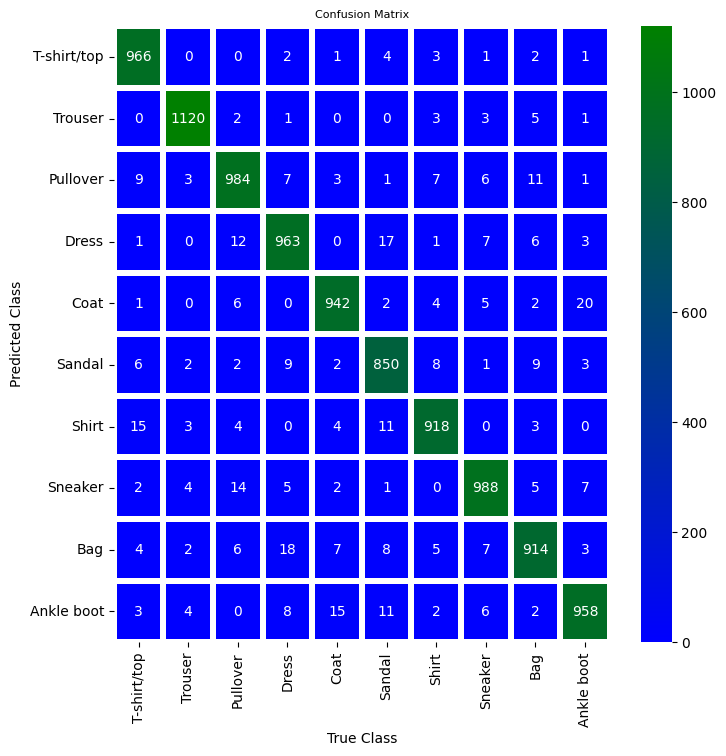

In [128]:
plot_confusion_matrix()

print(np.sum(fashion_mnist_test_label == 0))